In [79]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA

from integer_embedding import IntegerSequenceEmbeddingPreprocessor

# Load model

In [80]:
ise_pp = IntegerSequenceEmbeddingPreprocessor()

# Generate embeddings

In [81]:
integers = [x for x in range(-5000, 5000)]
embeddings = ise_pp.preprocess([integers])

In [82]:
print(embeddings.shape)
batch_size, sequence_length, embedding_dim = embeddings.shape
embeddings_reshaped = tf.reshape(embeddings, (batch_size * sequence_length, embedding_dim))
print(embeddings_reshaped.shape)

(1, 10000, 32)
(10000, 32)


PCA Reduction

In [83]:
pca = PCA(n_components=2)
embeddings_reduced_2d = pca.fit_transform(embeddings_reshaped)

# Plotting 2D PCA Plotline

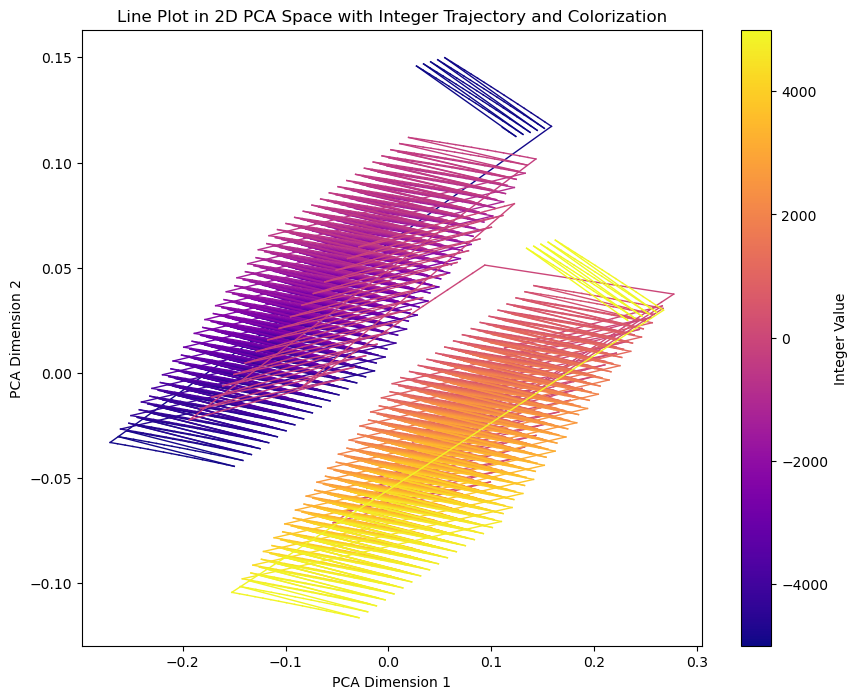

In [84]:
# Normalize integer values for color mapping
norm = mcolors.Normalize(vmin=np.min(integers), vmax=np.max(integers))
cmap = plt.get_cmap('plasma')

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the PCA components as points
scatter = ax.scatter(embeddings_reduced_2d[:, 0], embeddings_reduced_2d[:, 1], c=integers, cmap=cmap, marker='')

# Draw lines connecting the points in the order of the integers
# Colorize each segment based on its integer value
for i in range(len(integers) - 1):
    ax.plot(embeddings_reduced_2d[i:i+2, 0], embeddings_reduced_2d[i:i+2, 1],
            color=cmap(norm(integers[i])), linestyle='-', linewidth=1)

# Adding color bar to represent integer values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Integer Value')

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_title('Line Plot in 2D PCA Space with Integer Trajectory and Colorization')

plt.show()

# Plotting 3D PCA Scatterplot

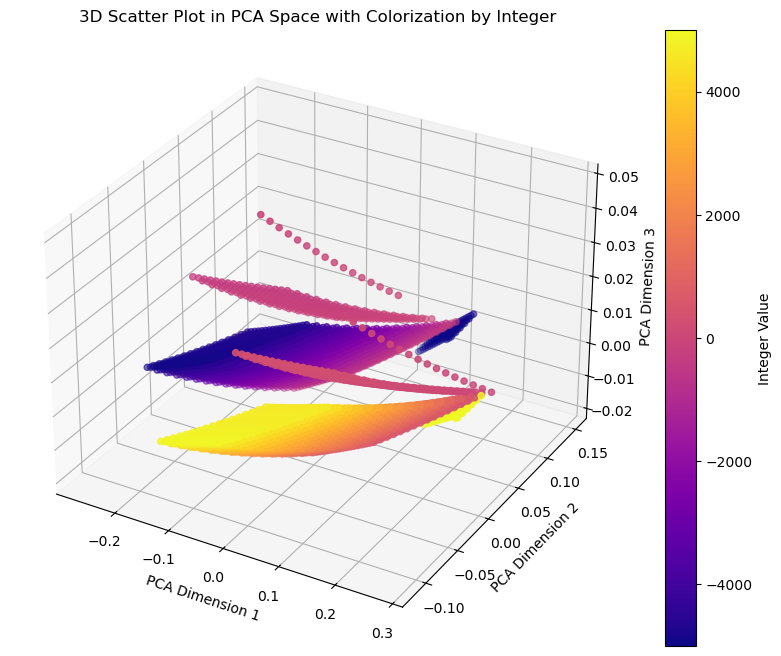

In [85]:
# Reduce dimensions with PCA to 3D
pca_3d = PCA(n_components=3)
embeddings_reduced_3d = pca_3d.fit_transform(embeddings_reshaped)

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(embeddings_reduced_3d[:, 0], embeddings_reduced_3d[:, 1], embeddings_reduced_3d[:, 2], c=integers,
                     cmap=cmap, marker='o')

# Adding color bar to represent integer values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Integer Value')

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.set_title('3D Scatter Plot in PCA Space with Colorization by Integer')

plt.show()